In [1]:
import cv2 as cv
import os

#This is code for bot2
bot_num = 2
#Extract frames from video
bot2 = cv.VideoCapture("bot{}.mp4".format(bot_num))

In [2]:
try:
    #Create data folder
    if not os.path.exists('data'):
        os.makedirs('data')
except OSError:
    print('Error: creating directory of frames of the video')
    
currentframe = 0

while True:
    ret,frame = bot2.read()
    if ret:
        # if not done reading, keep reading
        name = './data/bot{}frame{}.jpg'.format(bot_num, currentframe)
        print('Creating...'+name)
        
        #writing the extracted images
        cv.imwrite(name,frame)
        
        currentframe += 1
    else:
        break


Creating..../data/bot2frame0.jpg
Creating..../data/bot2frame1.jpg
Creating..../data/bot2frame2.jpg
Creating..../data/bot2frame3.jpg
Creating..../data/bot2frame4.jpg
Creating..../data/bot2frame5.jpg
Creating..../data/bot2frame6.jpg
Creating..../data/bot2frame7.jpg
Creating..../data/bot2frame8.jpg
Creating..../data/bot2frame9.jpg
Creating..../data/bot2frame10.jpg
Creating..../data/bot2frame11.jpg
Creating..../data/bot2frame12.jpg
Creating..../data/bot2frame13.jpg
Creating..../data/bot2frame14.jpg
Creating..../data/bot2frame15.jpg
Creating..../data/bot2frame16.jpg
Creating..../data/bot2frame17.jpg
Creating..../data/bot2frame18.jpg
Creating..../data/bot2frame19.jpg
Creating..../data/bot2frame20.jpg
Creating..../data/bot2frame21.jpg
Creating..../data/bot2frame22.jpg
Creating..../data/bot2frame23.jpg
Creating..../data/bot2frame24.jpg
Creating..../data/bot2frame25.jpg
Creating..../data/bot2frame26.jpg
Creating..../data/bot2frame27.jpg
Creating..../data/bot2frame28.jpg
Creating..../data/bot2fr

In [3]:
from math import atan2, cos, sin, sqrt, pi
import numpy as np
#Find and draw contour of bot

from matplotlib import pyplot as plt
#Extract a sample frome to play with

#Read one frame in gray
sample_frame = cv.imread("./data/bot{}frame{}.jpg".format(bot_num, 106))

#sample_frame = cv.medianBlur(sample_frame,5)

#Write sample frame in gray
cv.imwrite("./sample_frame_bot{}.jpg".format(bot_num), sample_frame)
print("Creating..../sample_frame_bot{}.jpg".format(bot_num))

gray = cv.imread("./sample_frame_bot{}.jpg".format(bot_num))

cv.imshow("sample_frame", gray)
cv.waitKey(0)
cv.destroyAllWindows()

Creating..../sample_frame_bot2.jpg


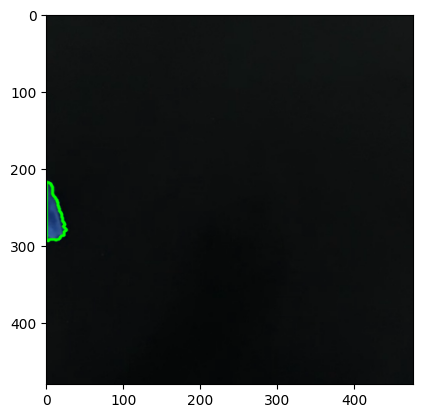

In [4]:
ret,thresh1 = cv.threshold(gray,50,255,cv.THRESH_BINARY)
plt.imshow(thresh1)
#black and white image generated

thresh1_copy = cv.cvtColor(thresh1, cv.COLOR_BGR2GRAY)
#Convert from RGB to binary

#Find contour
contours,hiearchy = cv.findContours(image=thresh1_copy,
                                    mode=cv.RETR_TREE,
                                    method=cv.CHAIN_APPROX_NONE,
                                   )

#Draw contour
image = cv.drawContours(gray, #Draw on RGB image, instead of binary image
                        contours,
                        contourIdx = -1,
                        thickness=2,
                        color=(0,255,0),
                        lineType=cv.LINE_AA)

plt.imshow(image)
#Hooya!

((13.0, 255.5), (26.0, 77.0), 0.0)


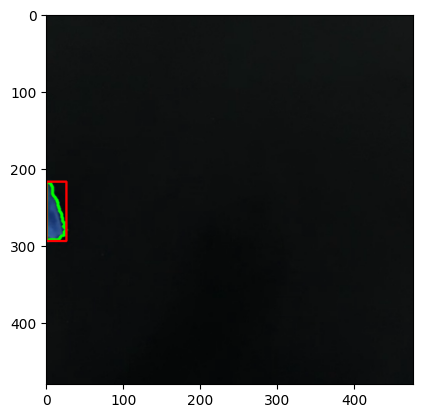

In [5]:
#Find the orientation of the bot

#To find out which contour is that of the bot: idea is to use the contour with the biggest area
area = 0
for contour in contours:
    rect = cv.minAreaRect(contour) # cv.minAreaRect = (center(x, y), (width, height), angle of rotation)
    if area < rect[1][0]*rect[1][0]:
        print(rect)
        break
    else: area = rect[1][0]*rect[1][0]

#Convert the rect object into four points
box = cv.boxPoints(rect)

box = np.intp(box)

#Rotataed Angle found
#print(box, rect)

#Draw the rectangle
image = cv.drawContours(gray, #Draw on RGB image, instead of binary image
                     [box],
                     0,
                     color=(255,0,0),
                     thickness=2)
plt.imshow(image)

In [6]:
#Method that gets the statistics of the bot
def GetBotStats(sample):
    """Returns an array of [box, rect, area, ellipse, angle], where box are coordinates of the corners of the 
    smallest rectangle that surrounds the bot and rect is an array that contains coordinates of 
    center of the rectangle, its width and height, and its angle with the horizontal axis"""
    
    #Write sample frame in gray
    cv.imwrite("./sample_frame_bot{}.jpg".format(bot_num), sample)
    
    current = cv.imread("./sample_frame_bot{}.jpg".format(bot_num))
    
    # Black and white image in RGB
    ret,thresh1 = cv.threshold(current,50,255,cv.THRESH_BINARY)
    
    #Convert from RGB to binary
    thresh1_copy = cv.cvtColor(thresh1, cv.COLOR_BGR2GRAY)
    
    #Find contour
    contours,hiearchy = cv.findContours(image=thresh1_copy,
                                        mode=cv.RETR_TREE,
                                        method=cv.CHAIN_APPROX_NONE,
                                       )
    
    #To find out which contour is that of the bot: 
    #idea is to use the contour with the biggest area
    area = 0
    ellipse = [0,0,0]
    for contour in contours:
        rect = cv.minAreaRect(contour) # cv.minAreaRect = (center(x, y), (width, height), angle of rotation)
        if area < rect[1][0]*rect[1][1]:
            ellipse = cv.fitEllipse(contour)
            area = rect[1][0]*rect[1][1]
            continue

    angle = ellipse[2]
    
    #Convert the rect object into four points
    box = cv.boxPoints(rect)

    box = np.intp(box)

    return [box, rect, area, ellipse, angle]

In [7]:
#Now do this for every frame
currentFrame = 0
stats = []
rect_video = cv.VideoWriter('bot{}_with_rectangle.mp4'.format(bot_num), 
                            cv.VideoWriter_fourcc(*'MP4V'), #MJPEG: motion JPEG
                            19,                                     #Frames per second
                            (int(bot2.get(3)), int(bot2.get(4))))   #(frame_width, frame_height)

while True:
    sample_frame = cv.imread("./data/bot{}frame{}.jpg".format(bot_num, currentFrame))
    stat = GetBotStats(sample_frame)
    stats += [stat]
    box = stat[0]
#   print("Problem index:{}, {}, {}".format(currentFrame, box[0], box[1]))
    currentFrame += 1
    if currentFrame > int(bot2.get(7))-1: #number of frames in this video
        cv.waitKey(0)
        cv.destroyAllWindows()
        break
    else: cv.waitKey(1)
    #Draw the rectangle on colored image
    cv.drawContours(sample_frame, #Draw on RGB image, instead of binary image
                             [box],
                             0,
                             color=(0,255,0),
                             thickness=1)
    rect_video.write(sample_frame)
    #cv.imshow("With Rectangle Box", image)
    #Draw ellipse on colored image
    cv.ellipse(sample_frame, stat[3],(255,0,0),2)
#    cv.imshow("With Ellipse", sample_frame)
#    cv.waitKey(0)
    
# #     if currentFrame in range(106,107):
# #         #Display the colored video with rectangle box around bot
# #         cv.imshow("With rectangle box", image)
# #         # Press Q on keyboard to  exit
# #         # If you want the full data, please let the code play the video completly
# #         if cv.waitKey(0) & 0xFF == ord('q'):
# #             break

print('done')
rect_video.release()

done


[]


Text(0, 0.5, 'Number of rotations')

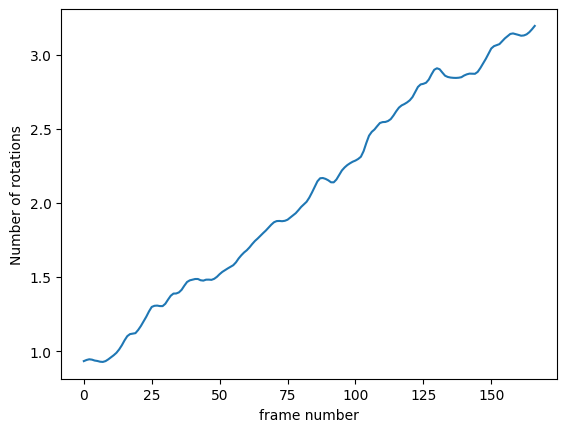

In [34]:
import math

orientations = []
for stat in stats:
    orientations +=[stat[4]]

#Get true orientations by tweaking the generated orientation
print([True for o in orientations if o == float('nan')])

new = []
flag = 0
for i in range(len(orientations)):
    # If the orientation changes by more than 85 degrees from frame to frame, 
    # we say that there has been an error and we correct for angles
    if abs(orientations[i]-orientations[i-1]) > 85:
        flag += 1
    new+=[(orientations[i]+180*flag)/360]

plt.plot(range(len(new)), new)
plt.xlabel('frame number')
plt.ylabel('Number of rotations')

In [9]:
# Video reader to inspect specific frames
for i in range(106,107):
    cv.imshow("Window", cv.imread("./data/bot{}frame{}.jpg".format(bot_num, i)))
    cv.waitKey(0)
cv.destroyAllWindows()

0.2796008137351092


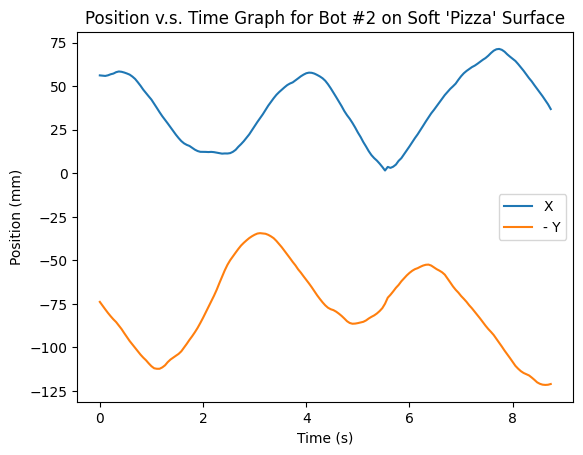

In [30]:
# Generate Position
positions = [stat[1][0] for stat in stats]

# Scale the positions correctly, find out how long is one pixel
areas = [stat[2] for stat in stats]
actual_size = 43.6*13.78 #millimeter^2
average = sum(areas)/len(areas)

ratio = actual_size/average
print(ratio)

positions = [[p[0]*ratio, p[1]*ratio] for p in positions]
times = np.arange(0,len(positions)/19, 1/19)

plt.plot(times, [[p[0], -p[1]] for p in positions], label=['X', '- Y'])
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')
plt.title('Position v.s. Time Graph for Bot #2 on Soft \'Pizza\' Surface')
plt.legend()

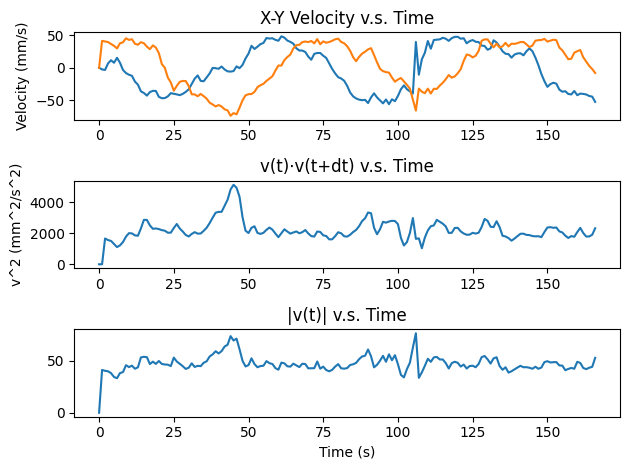

In [44]:
import math
#Generate Velocity Graph
dt = 1/19  # time for one frame
dx,dy = [],[]
fig,axs = plt.subplots(3,1)
for i in range(len(positions)):
    dx += [positions[i][0]-positions[i-1 if i > 0 else 0][0]]
    dy += [positions[i][1]-positions[i-1 if i > 0 else 0][1]]
    
velocities = [[x/dt, y/dt] for x,y in zip(dx,dy)] 
axs[0].plot(velocities)
axs[2].set_xlabel('Time (s)')
axs[0].set_ylabel('Velocity (mm/s)')
axs[0].set_title('X-Y Velocity v.s. Time')
dot_products = []
for i in range(len(velocities)):
    dot_products += [velocities[i][0]*velocities[i-1 if i>0 else 0][0]\
                    +velocities[i][1]*velocities[i-1 if i>0 else 0][1]]
axs[1].plot(dot_products)
axs[1].set_title('v(t)⋅v(t+dt) v.s. Time')
axs[1].set_ylabel('v^2 (mm^2/s^2)')
axs[2].plot([math.sqrt(v[0]**2+v[1]**2) for v in velocities])
axs[2].set_title('|v(t)| v.s. Time')
plt.tight_layout()
plt.show()

Generate a graph with $<v(t)\cdot v(t+dt)>$

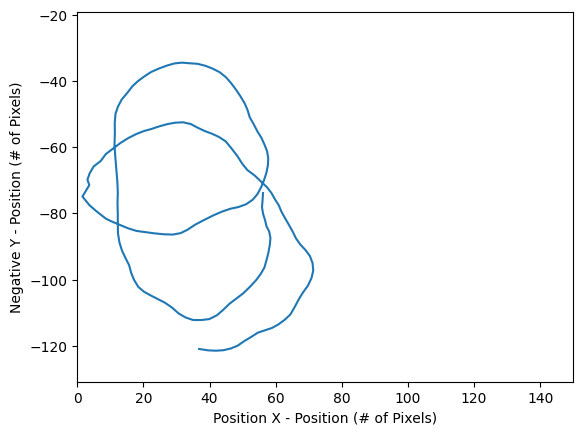

In [40]:
# Generate path
fig, ax = plt.subplots()
ax.plot([p[0] for p in positions],
            [-p[1] for p in positions])
plt.xlabel('Position X - Position (# of Pixels)')
plt.ylabel('Negative Y - Position (# of Pixels)')
ax.axis('equal')
ax.set(xlim=(0, 150), ylim=(-150,0))
plt.show()